![example](images/director_shot.jpeg)

# Project Title

**Authors:** Gajanani Sanchayan
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [552]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data = pd.read_csv('kc_house_data.csv', index_col=0)


In [20]:
# Here you run your code to explore the data
data.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


data.describe()


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [553]:
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan)
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [554]:
#drop un necessary variables

data = data.drop(['date', 'zipcode', 'lat','long','sqft_living15','sqft_lot15','view','yr_built','yr_renovated'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

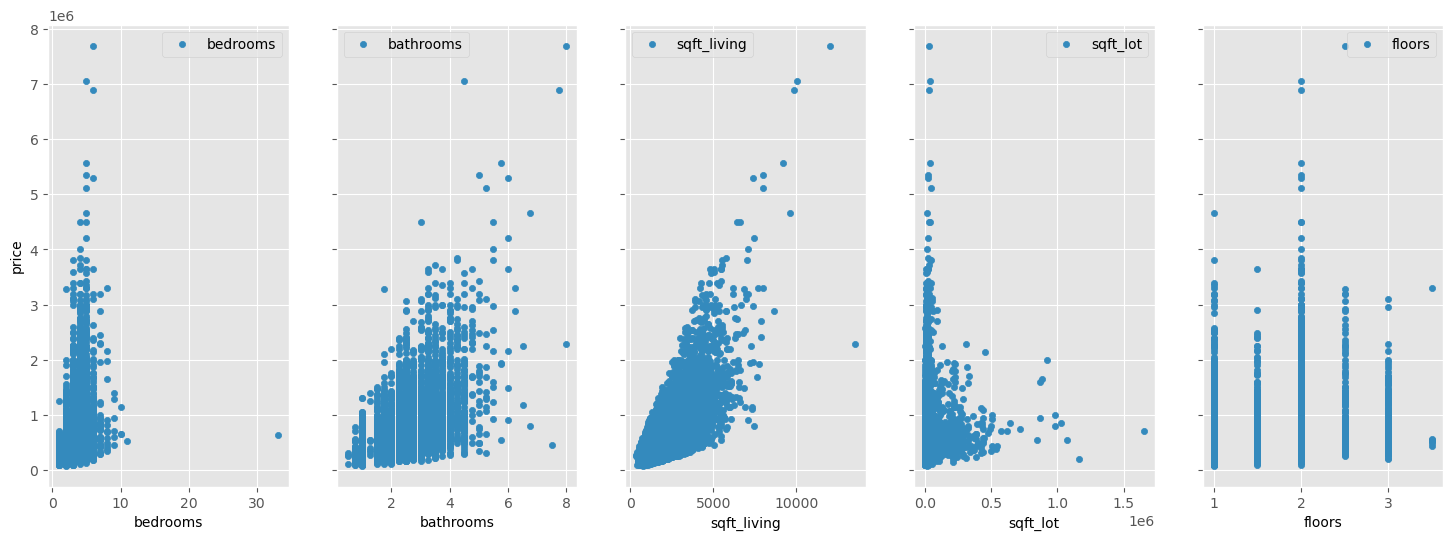

In [555]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

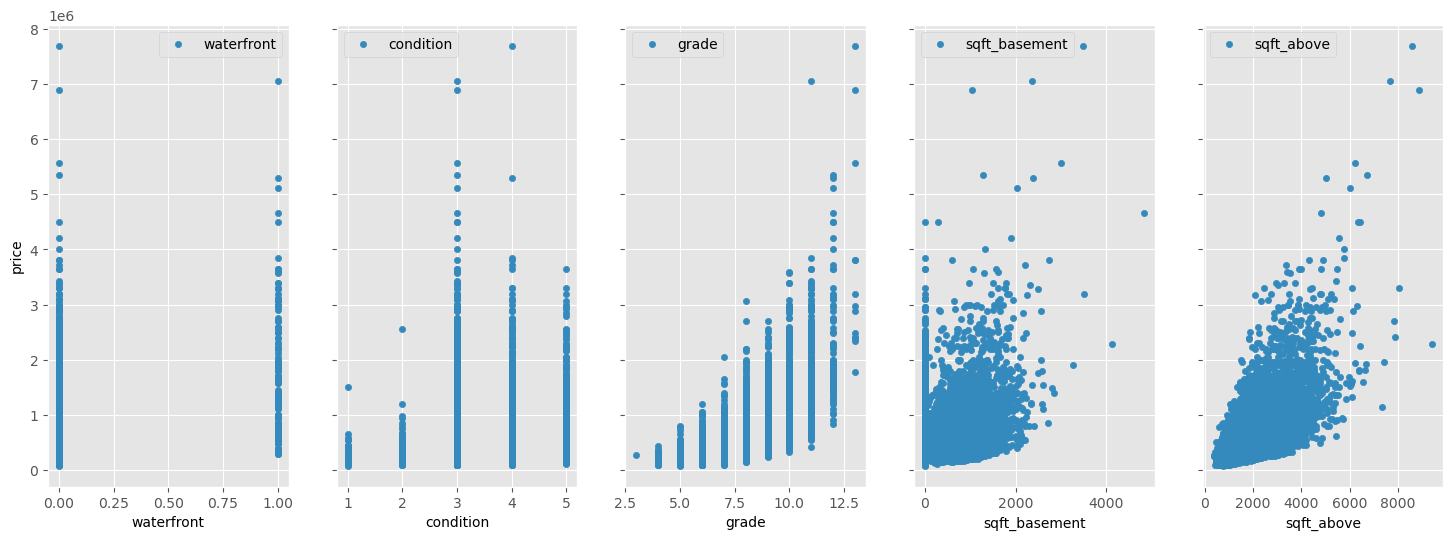

In [526]:
# Here you run your code to clean the data
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['waterfront','condition','grade','sqft_basement','sqft_above']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()


## Baseline Model

***

In [41]:
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [556]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 'condition','grade','sqft_basement','waterfront','sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     3117.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:09:35   Log-Likelihood:            -2.5934e+05
No. Observations:               18804   AIC:                         5.187e+05
Df Residuals:                   18794   BIC:                         5.188e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.412e+05   1.91e+04    -38.791      0.000   -7.79e+05   -7.04e+05
bedrooms      -3.979e+04   2369.256    -16.792      0.000   -4.44e+04   -3.51e+04
bathrooms      -1.76e+04   3849.336     -4.573      0.000   -2.51e+04   -1.01e+04
sqft_living     149.6001      2.588     57.800      0.000     144.527     154.673
sqft_lot         -0.3221      0.043     -7.444      0.000      -0.407      -0.237
floors        -2573.2401   4345.887     -0.592      0.554   -1.11e+04    5945.090
condition      5.722e+04   2780.562     20.579      0.000    5.18e+04    6.27e+04
grade          1.085e+05   2480.419     43.725      0.000    1.04e+05    1.13e+05
sqft_basement    99.0323      3.139     31.545      0.000      92.879     105.186
waterfront     8.141e+05   2.01e+04     40.440      0.000    7.75e+05    8.54e+05
sqft_above       50.5679      2.544     19.879      0.000      45.582      55.554
==============================================================================
Omnibus:                    13664.721   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           788389.319
Skew:                           2.922   Prob(JB):                         0.00
Kurtosis:                      34.178   Cond. No.                     1.28e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

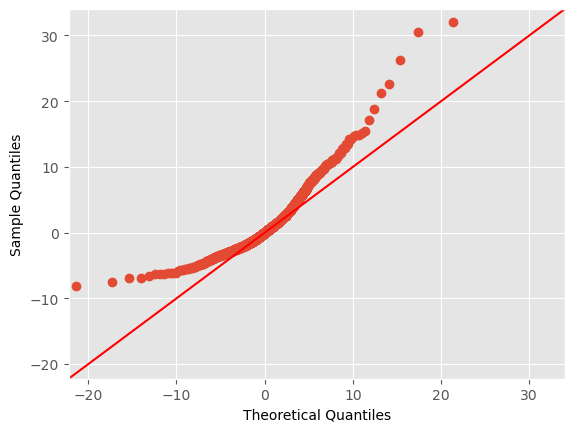

In [557]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
#Overall q-q plot of the model
res = model.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()


In [ ]:
#R-square is 0.66 which is good but Q-Q plot of the Residual is a curved line suggesting residuals have a non-normal distribution


In [ ]:
##LINEAR ASSUMPTIOMS

eval_env: 1


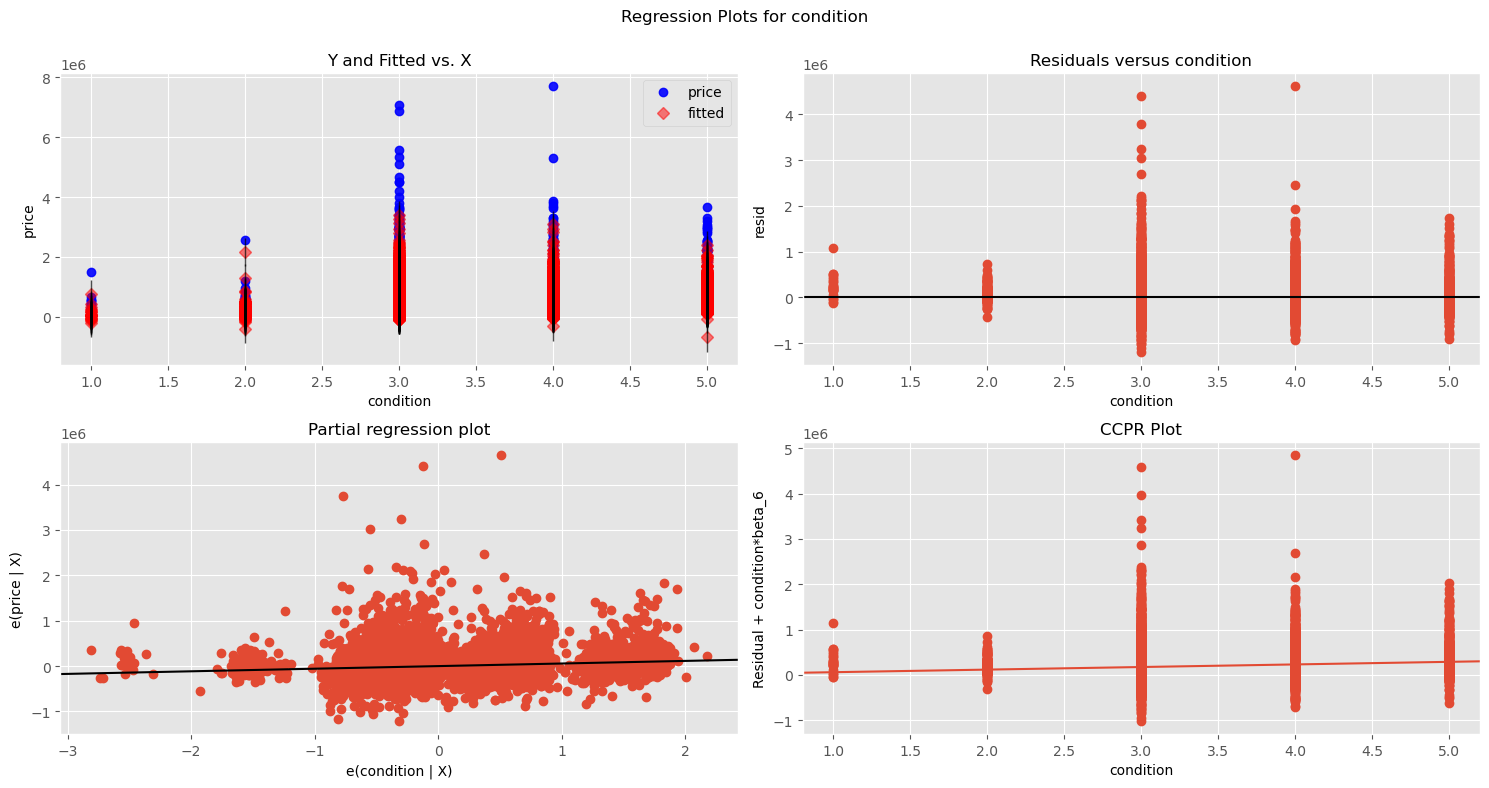

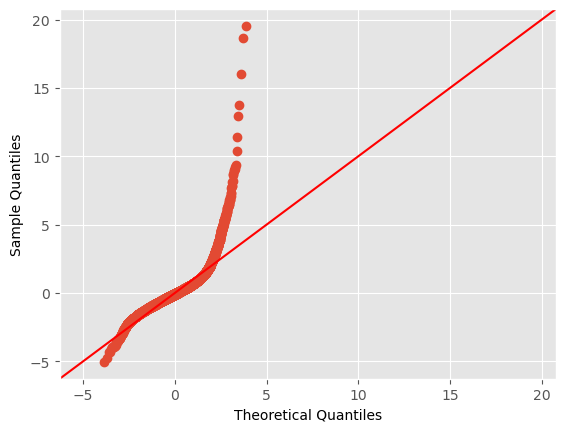

In [530]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()


eval_env: 1


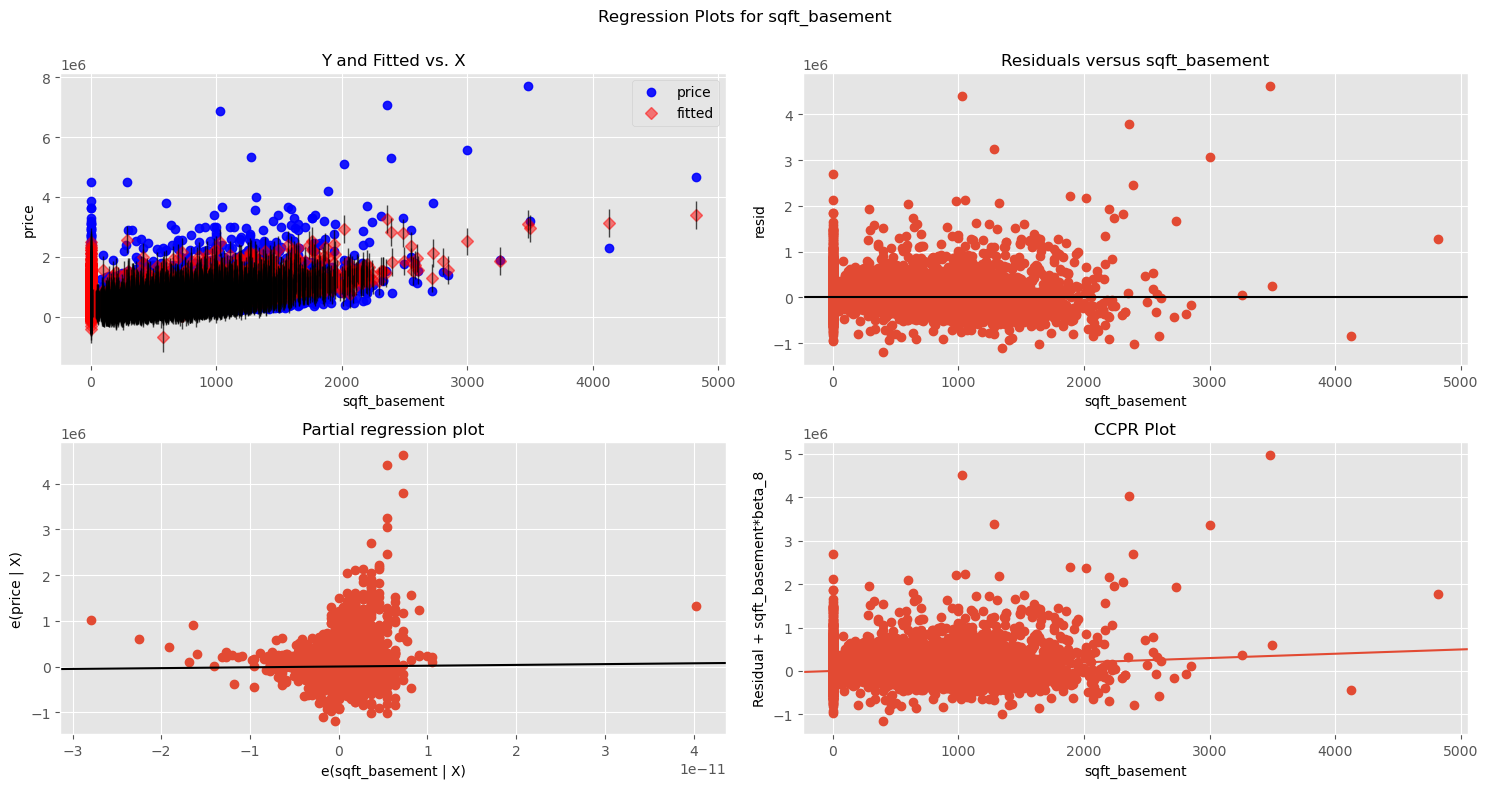

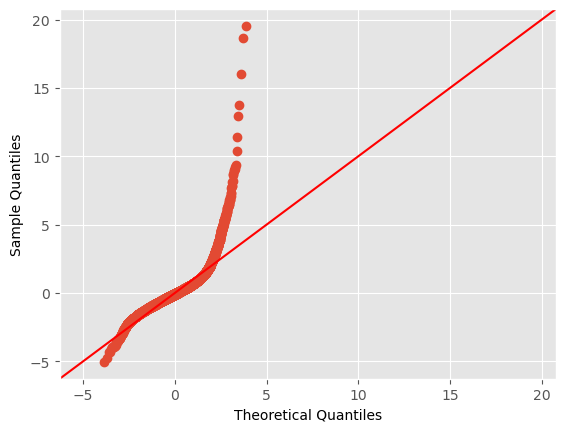

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_basement", fig=fig)
plt.show()

import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()


eval_env: 1


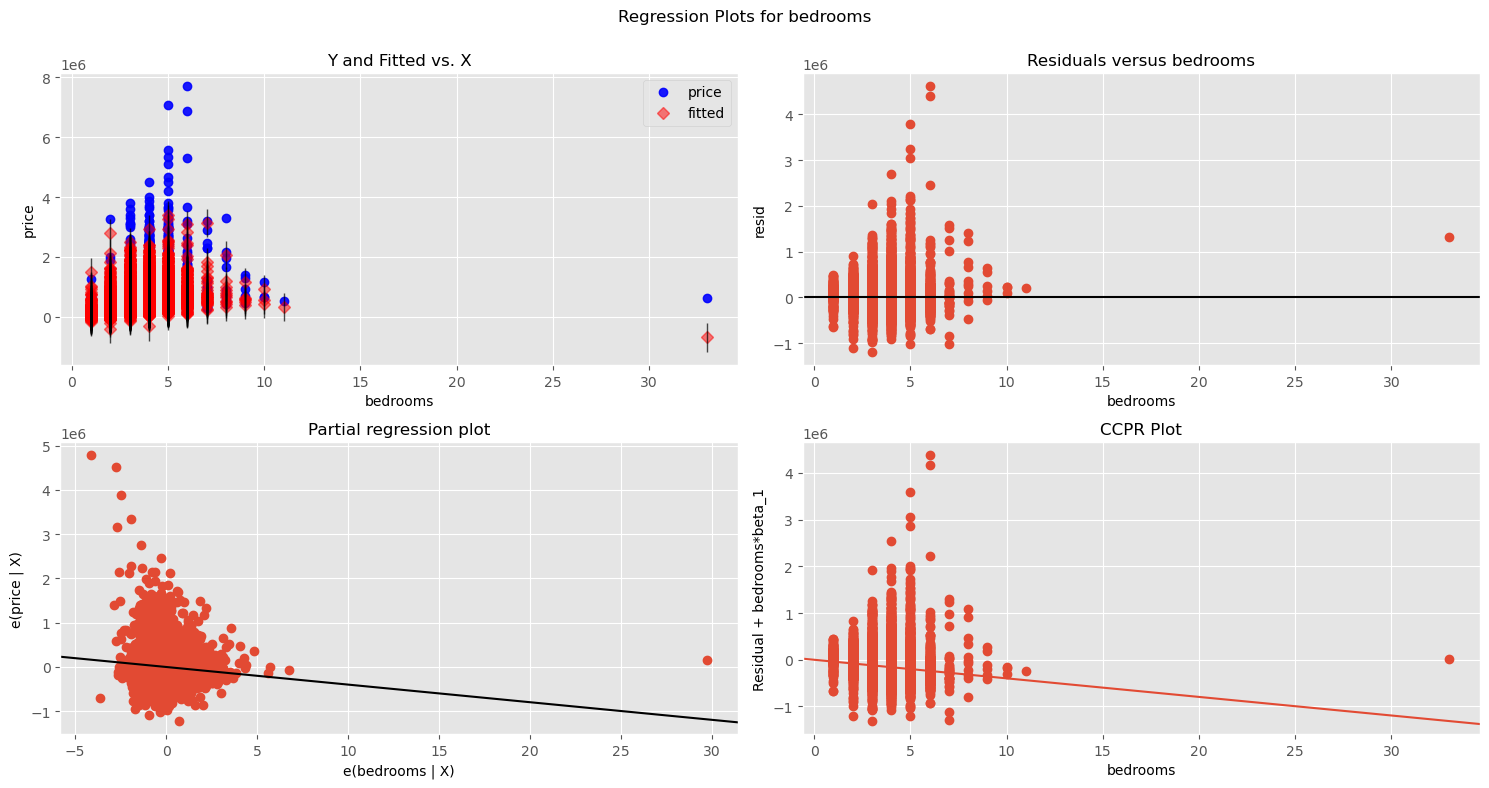

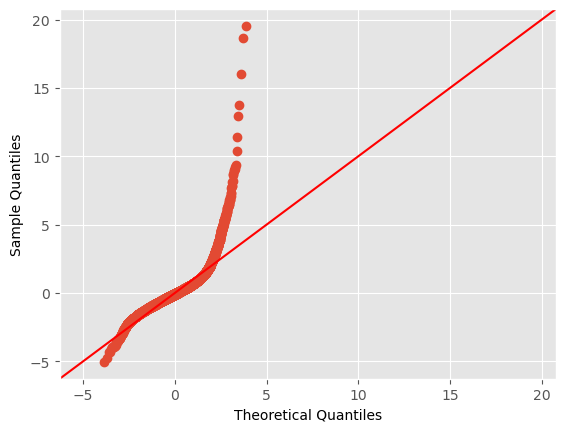

In [531]:


fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()


eval_env: 1


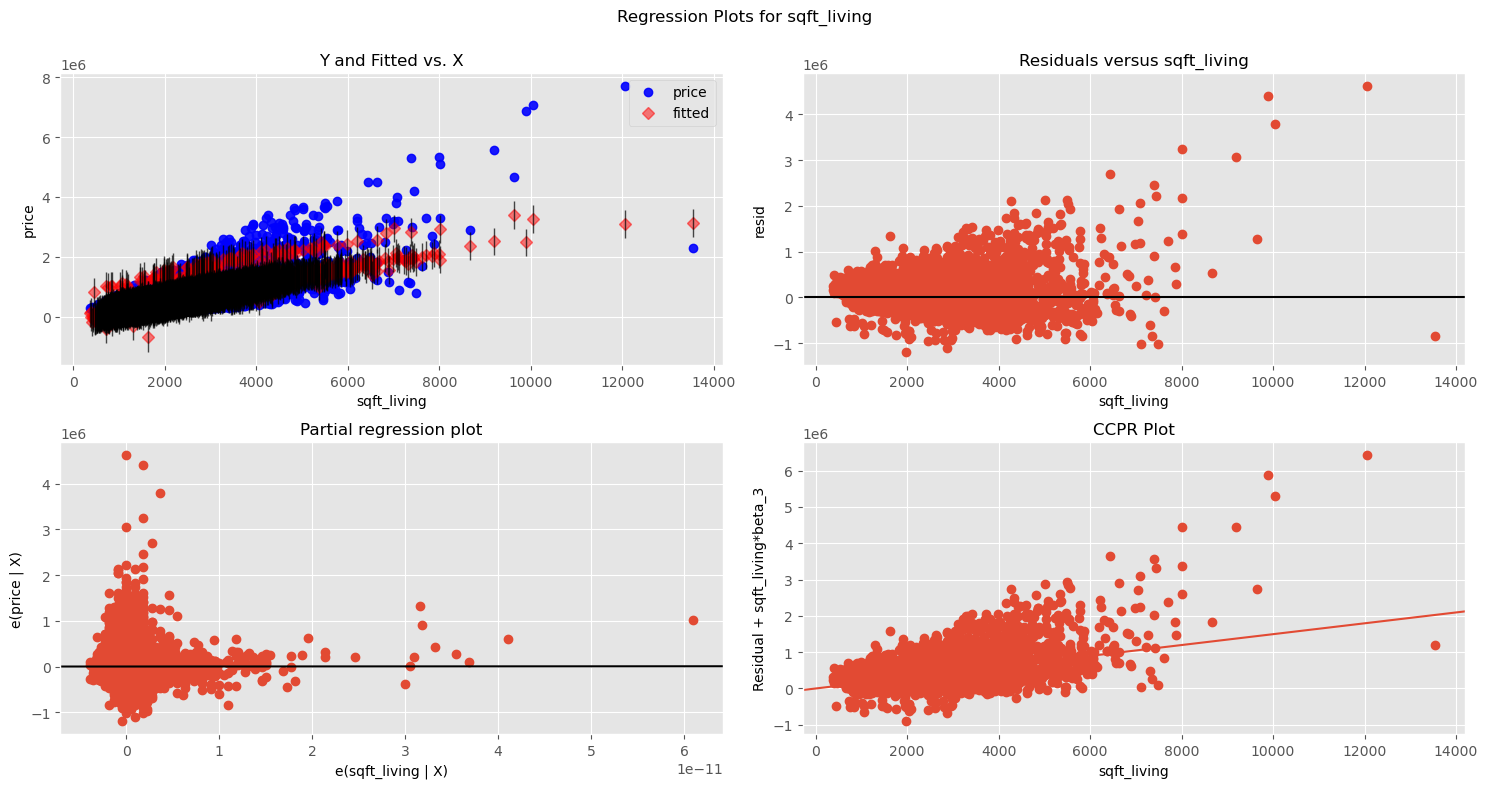

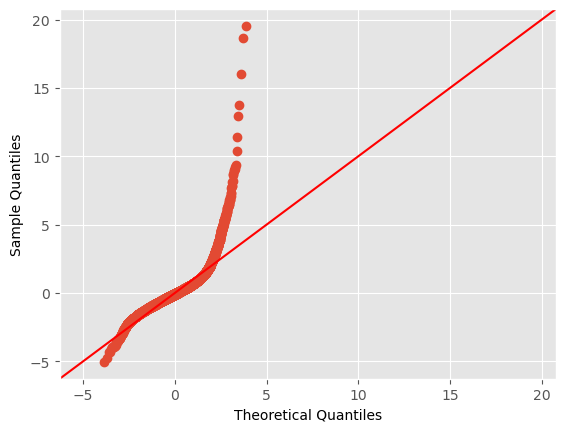

In [73]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

import scipy.stats as stats
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()


In [ ]:
#Homoscedasticity Plot shows the dependent variable is unequal across the range of values of the independent variable. (Cone-like shape)

#Normality plots of the Model Residual shows that residual have non normal Distribution
#This suggests we will need to do log Transformation and remove outliers in the next Iteration


In [ ]:
## Iteration 2

In [558]:
#REMOVING OUTLIERS
z_scores = np.abs((data - data.mean()) / data.std())
z_score_threshold = 3

outlier_mask = (z_scores <= z_score_threshold).all(axis=1)
filtered_data = data[outlier_mask]
X_filtered = filtered_data.drop('price', axis=1)
y_filtered = filtered_data['price']


In [516]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842 entries, 6414100192 to 2997800021
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          6842 non-null   float64
 1   bedrooms       6842 non-null   int64  
 2   bathrooms      6842 non-null   float64
 3   sqft_living    6842 non-null   float64
 4   sqft_lot       6842 non-null   float64
 5   floors         6842 non-null   float64
 6   waterfront     6842 non-null   float64
 7   condition      6842 non-null   int64  
 8   grade          6842 non-null   int64  
 9   sqft_above     6842 non-null   int64  
 10  sqft_basement  6842 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 641.4 KB


In [560]:


#drop floors as not significant
filtered_data=filtered_data.drop(['floors'], axis=1)

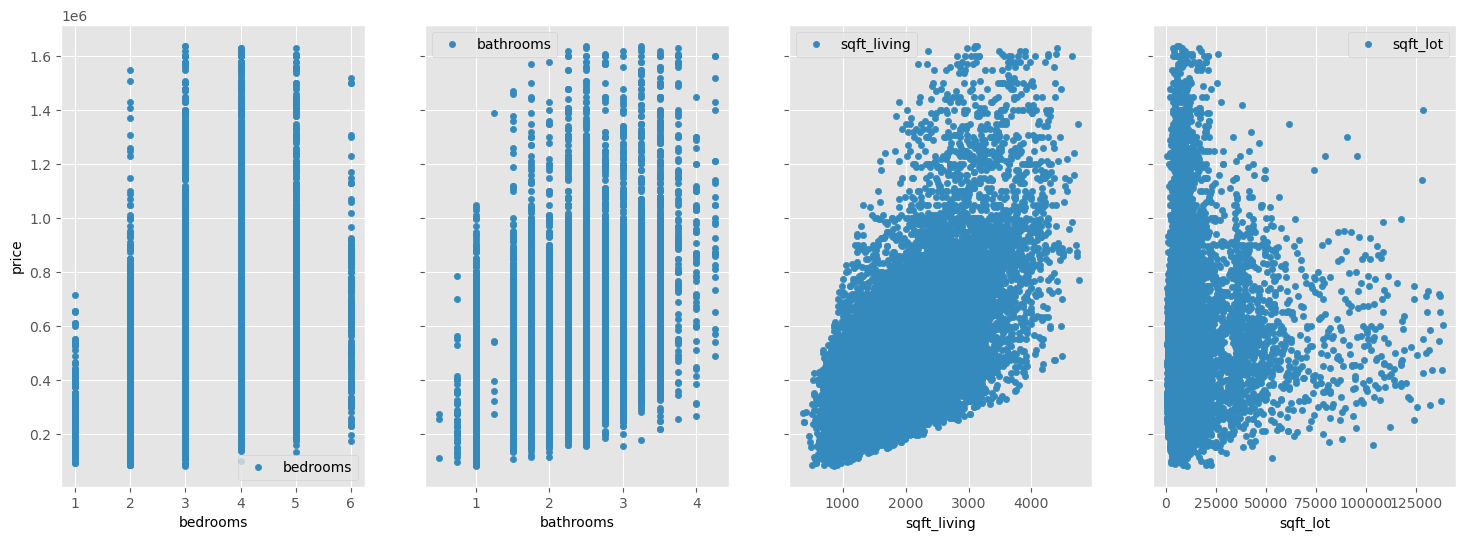

In [561]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living','sqft_lot']):
    filtered_data .plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()


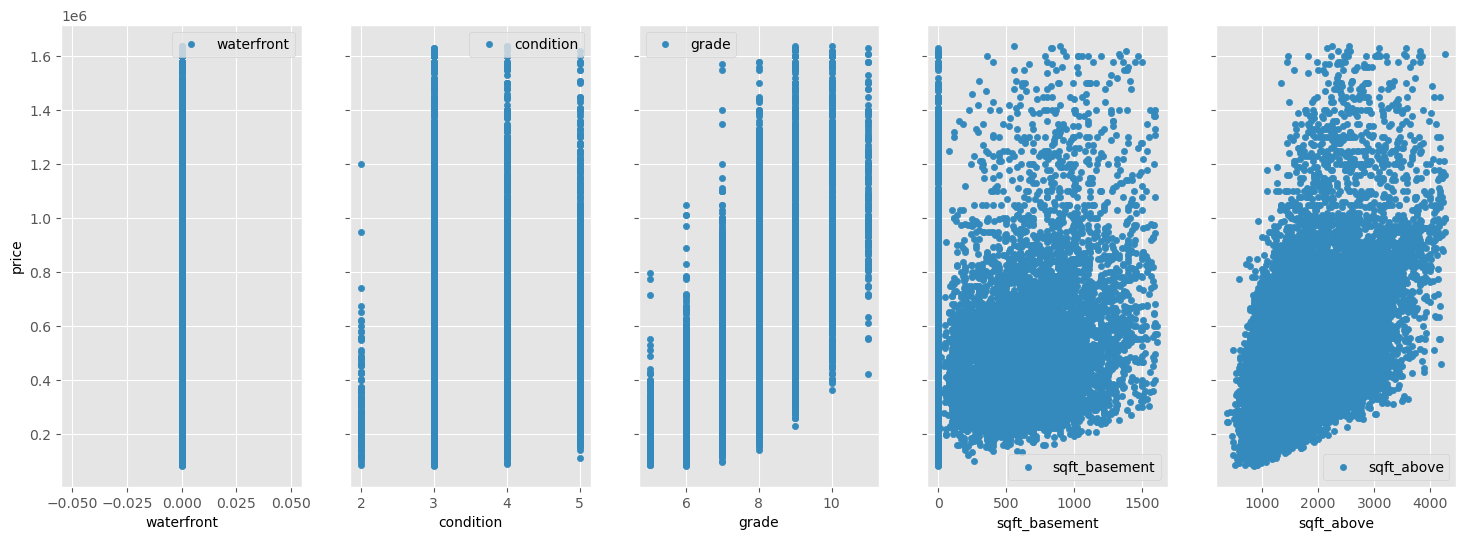

In [563]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['waterfront','condition','grade','sqft_basement','sqft_above']):
    filtered_data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()


In [562]:
#Create Dummies for Categorical data
continuous = ['sqft_living','sqft_lot','sqft_basement','sqft_above']
categoricals = ['bedrooms', 'bathrooms','waterfront','condition','grade']

Filtered_data = pd.get_dummies(filtered_data, columns=categoricals, prefix=categoricals,drop_first=True)

In [234]:
Filtered_data.head() 

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,...,grade_7,grade_8,grade_9,grade_10,grade_11,Bed2_3,Bed4_6,bath1_2,bath2_5,grade8_11
id,,,,,,,,,,,,,,,,,,,,,
6414100192,538000.0,2570,7242,2170,400.0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5631500400,180000.0,770,10000,770,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2487200875,604000.0,1960,5000,1050,910.0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
1954400510,510000.0,1680,8080,1680,0.0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,1
2008000270,291850.0,1060,9711,1060,0.0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [536]:
Filtered_data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           0 non-null      object 
 1   price          0 non-null      float64
 2   sqft_living    0 non-null      int64  
 3   sqft_lot       0 non-null      int64  
 4   floors         0 non-null      float64
 5   view           0 non-null      float64
 6   sqft_above     0 non-null      int64  
 7   sqft_basement  0 non-null      float64
 8   yr_built       0 non-null      int64  
 9   yr_renovated   0 non-null      float64
 10  zipcode        0 non-null      int64  
 11  lat            0 non-null      float64
 12  long           0 non-null      float64
 13  sqft_living15  0 non-null      int64  
 14  sqft_lot15     0 non-null      int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 0.0+ bytes


In [577]:

#Dummy variable
Filtered_data['Bed2_3']= Filtered_data['bedrooms_2'] + Filtered_data['bedrooms_3']
Filtered_data['Bed4_6']= Filtered_data['bedrooms_4'] + Filtered_data['bedrooms_5'] +Filtered_data['bedrooms_6']
Filtered_data['bath1_2']= Filtered_data['bathrooms_0.75'] + Filtered_data['bathrooms_1.0'] +Filtered_data['bathrooms_1.25']+Filtered_data['bathrooms_1.5']+Filtered_data['bathrooms_1.75']+Filtered_data['bathrooms_2.0']
Filtered_data['bath2_5']= Filtered_data['bathrooms_2.25'] + Filtered_data['bathrooms_2.5'] +Filtered_data['bathrooms_2.75']+Filtered_data['bathrooms_3.0']+Filtered_data['bathrooms_3.25']+Filtered_data['bathrooms_3.5']+Filtered_data['bathrooms_3.75']+Filtered_data['bathrooms_4.0']+Filtered_data['bathrooms_4.25']
Filtered_data['grade8_11']= Filtered_data['grade_8'] + Filtered_data['grade_9']+ Filtered_data['grade_10']+ Filtered_data['grade_11']
New_data = Filtered_data.drop(['bedrooms_2', 'bedrooms_3','bedrooms_4','bedrooms_5','bedrooms_6','bathrooms_0.75','bathrooms_1.0','bathrooms_1.25','bathrooms_1.5','bathrooms_1.75','bathrooms_2.0','bathrooms_2.25','bathrooms_2.5','bathrooms_2.75','bathrooms_3.0','bathrooms_3.25','bathrooms_3.5','bathrooms_3.75','bathrooms_4.0','bathrooms_4.25','grade_6','grade_7','grade_8','grade_9','grade_10','grade_11'], axis=1)


In [542]:
New_data .info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842 entries, 6414100192 to 2997800021
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          6842 non-null   float64
 1   sqft_living    6842 non-null   float64
 2   sqft_lot       6842 non-null   float64
 3   floors         6842 non-null   float64
 4   sqft_basement  6842 non-null   float64
 5   condition_4    6842 non-null   uint8  
 6   condition_5    6842 non-null   uint8  
 7   Bed4_6         6842 non-null   uint8  
 8   bath2_5        6842 non-null   uint8  
 9   grade8_11      6842 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 354.1 KB


In [550]:
New_data.describe()

,price,sqft_living,sqft_lot,floors,sqft_basement,condition_4,condition_5,Bed4_6,bath2_5,grade8_11
count,6.842000e+03,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000
mean,5.591069e+05,2.033167,2.180340,1.289097,1.857628,0.308536,0.110348,0.469453,0.533177,0.471938
std,2.705660e+05,0.042748,0.089944,0.453054,0.093403,0.461923,0.313346,0.499103,0.498935,0.499248
min,1.000000e+05,1.875195,1.899808,1.000000,1.547665,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.675000e+05,2.004257,2.142087,1.000000,1.809804,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000e+05,2.032783,2.187467,1.000000,1.879630,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.750000e+05,2.061712,2.222217,1.500000,1.923647,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.640000e+06,2.164221,2.484474,3.000000,2.073810,1.000000,1.000000,1.000000,1.000000,1.000000


# multicollinearity

pd.plotting.scatter_matrix(New_data,figsize  = [9, 9]);
plt.show()


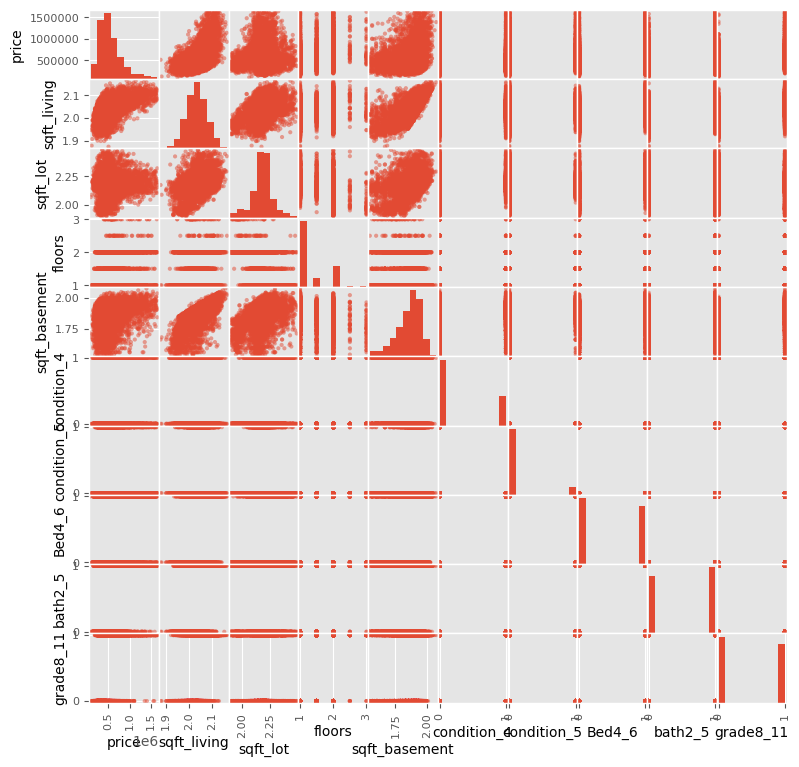

In [551]:
pd.plotting.scatter_matrix(New_data,figsize  = [9, 9]);
plt.show()

In [346]:
New_data.corr()



,price,sqft_living,sqft_lot,sqft_above,sqft_basement,condition_3,condition_4,condition_5,Bed2_3,Bed4_6,bath1_2,bath2_5,grade8_11
price,1.000000,0.633505,0.079805,0.533158,0.244285,0.007749,-0.037991,0.069993,-0.284342,0.298190,-0.362335,0.362725,0.513258
sqft_living,0.633505,1.000000,0.211319,0.855987,0.359643,0.111735,-0.091918,-0.025964,-0.527623,0.554581,-0.605517,0.606011,0.579772
sqft_lot,0.079805,0.211319,1.000000,0.203804,0.034636,-0.064845,0.072578,-0.017354,-0.068645,0.068887,-0.046143,0.046273,0.085754
sqft_above,0.533158,0.855987,0.203804,1.000000,-0.174556,0.204534,-0.149388,-0.099440,-0.436241,0.459392,-0.587041,0.587589,0.580922
sqft_basement,0.244285,0.359643,0.034636,-0.174556,1.000000,-0.156344,0.094557,0.130022,-0.217546,0.227104,-0.093731,0.093681,0.055742
condition_3,0.007749,0.111735,-0.064845,0.204534,-0.156344,1.000000,-0.817182,-0.395648,-0.017566,0.017320,-0.232549,0.232536,0.192402
condition_4,-0.037991,-0.091918,0.072578,-0.149388,0.094557,-0.817182,1.000000,-0.174740,0.024480,-0.023909,0.186393,-0.186445,-0.144016
condition_5,0.069993,-0.025964,-0.017354,-0.099440,0.130022,-0.395648,-0.174740,1.000000,-0.016391,0.018017,0.085584,-0.085485,-0.084690
Bed2_3,-0.284342,-0.527623,-0.068645,-0.436241,-0.217546,-0.017566,0.024480,-0.016391,1.000000,-0.982528,0.344249,-0.344295,-0.251981
Bed4_6,0.298190,0.554581,0.068887,0.459392,0.227104,0.017320,-0.023909,0.018017,-0.982528,1.000000,-0.361694,0.361966,0.266428


In [368]:
abs(New_data.corr()) > 0.75

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,condition_3,condition_4,condition_5,Bed2_3,Bed4_6,bath1_2,bath2_5,grade8_11
price,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,True,False,True,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,True,False,False,False,False,False,False,False,False
condition_3,False,False,False,False,False,True,True,False,False,False,False,False,False
condition_4,False,False,False,False,False,True,True,False,False,False,False,False,False
condition_5,False,False,False,False,False,False,False,True,False,False,False,False,False
Bed2_3,False,False,False,False,False,False,False,False,True,True,False,False,False
Bed4_6,False,False,False,False,False,False,False,False,True,True,False,False,False


In [357]:
df = New_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(bath1_2, bath2_5)",0.999660
"(Bed2_3, Bed4_6)",0.982528
"(sqft_living, sqft_above)",0.855987
"(condition_3, condition_4)",0.817182


In [349]:
#There are three sets of variales that are highly correlated.

#bath1_2, bath2_5, Bed4_6, Bed2_3, sqft_living, sqft_above and condition_4, condition_3 .


In [369]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842 entries, 6414100192 to 2997800021
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          6842 non-null   float64
 1   sqft_living    6842 non-null   float64
 2   sqft_lot       6842 non-null   float64
 3   sqft_above     6842 non-null   int64  
 4   sqft_basement  6842 non-null   float64
 5   condition_3    6842 non-null   uint8  
 6   condition_4    6842 non-null   uint8  
 7   condition_5    6842 non-null   uint8  
 8   Bed2_3         6842 non-null   uint8  
 9   Bed4_6         6842 non-null   uint8  
 10  bath1_2        6842 non-null   uint8  
 11  bath2_5        6842 non-null   uint8  
 12  grade8_11      6842 non-null   uint8  
dtypes: float64(4), int64(1), uint8(8)
memory usage: 374.2 KB


In [521]:
#drop

New_data=New_data.drop(['sqft_above','condition_3','Bed2_3','bath1_2'],axis=1)
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842 entries, 6414100192 to 2997800021
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          6842 non-null   float64
 1   sqft_living    6842 non-null   float64
 2   sqft_lot       6842 non-null   float64
 3   floors         6842 non-null   float64
 4   sqft_basement  6842 non-null   float64
 5   condition_4    6842 non-null   uint8  
 6   condition_5    6842 non-null   uint8  
 7   Bed4_6         6842 non-null   uint8  
 8   bath2_5        6842 non-null   uint8  
 9   grade8_11      6842 non-null   uint8  
dtypes: float64(5), uint8(5)
memory usage: 354.1 KB


In [ ]:
#Log tranformation

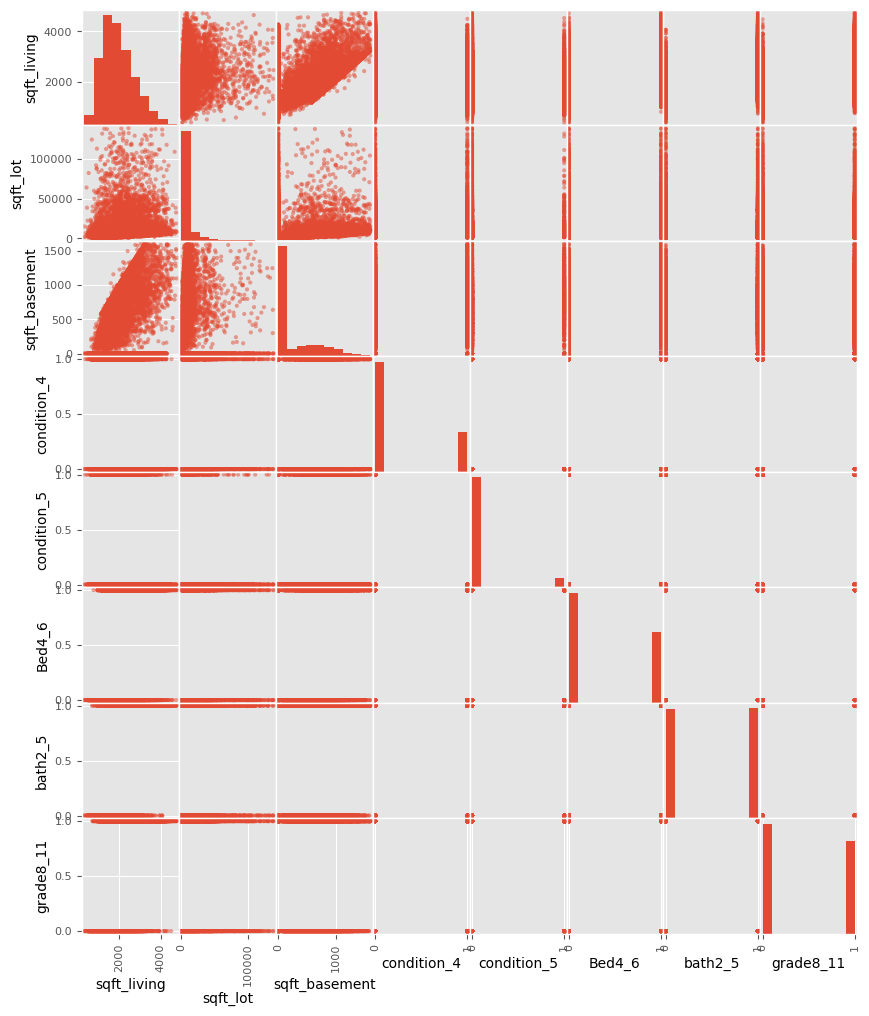

In [578]:
pd.plotting.scatter_matrix(New_data[x2_cols], figsize=(10,12));

In [571]:

#Log Transformation for continous variable


In [372]:
outcome = 'price'
x2_cols = ['sqft_living', 'sqft_lot', 'sqft_basement','condition_4', 'condition_5', 'Bed4_6' , 'bath2_5', 'grade8_11']

C:\Users\sri_s\AppData\Local\Temp\ipykernel_22524\1697297111.py:5: RuntimeWarning: invalid value encountered in log
  New_data[feat] = New_data[feat].map(lambda x: np.log(x))


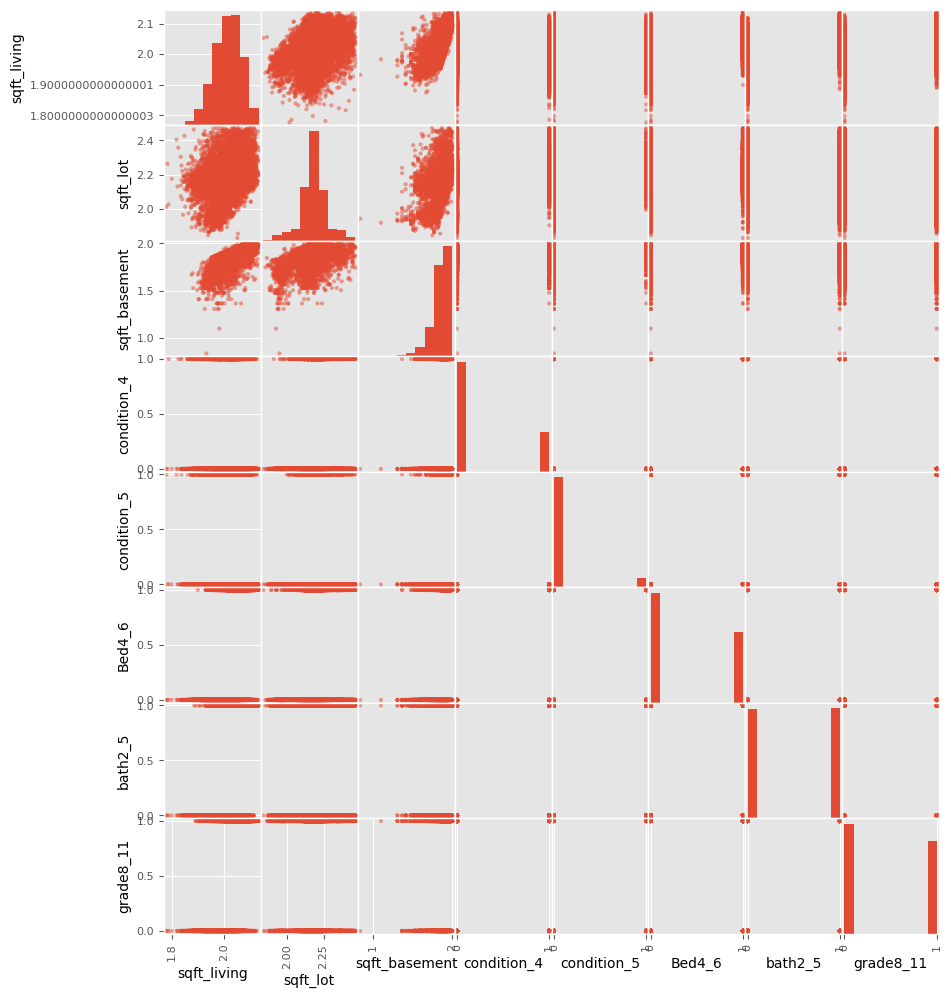

In [573]:
Categorical = ['price','condition_4', 'condition_5', 'Bed4_6' , 'bath2_5', 'grade8_11']
continuous = ['sqft_living','sqft_lot','sqft_basement']

for feat in continuous:
    New_data[feat] = New_data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(New_data[x2_cols], figsize=(10,12));

In [374]:
outcome = 'price'
x2_cols = ['sqft_living', 'sqft_lot', 'sqft_basement','condition_4', 'condition_5', 'Bed4_6' , 'bath2_5', 'grade8_11']
predictors = '+'.join(x2_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=New_data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     702.3
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:26:22   Log-Likelihood:                -93237.
No. Observations:                6842   AIC:                         1.865e+05
Df Residuals:                    6833   BIC:                         1.866e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.374e+06   1.21e+05    -36.299      0.000   -4.61e+06   -4.14e+06
sqft_living    9.017e+06   2.16e+05     41.692      0.000    8.59e+06    9.44e+06
sqft_lot      -1.168e+06   6.73e+04    -17.350      0.000    -1.3e+06   -1.04e+06
sqft_basement -9.884e+05   6.97e+04    -14.176      0.000   -1.13e+06   -8.52e+05
condition_4    3.747e+04   5568.255      6.729      0.000    2.66e+04    4.84e+04
condition_5     1.15e+05   8116.578     14.174      0.000    9.91e+04    1.31e+05
Bed4_6        -1.537e+04   5640.171     -2.724      0.006   -2.64e+04   -4309.061
bath2_5       -3.003e+04   5900.270     -5.089      0.000   -4.16e+04   -1.85e+04
grade8_11      1.196e+05   6140.500     19.475      0.000    1.08e+05    1.32e+05
==============================================================================
Omnibus:                      799.378   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1333.918
Skew:                           0.809   Prob(JB):                    2.21e-290
Kurtosis:                       4.435   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

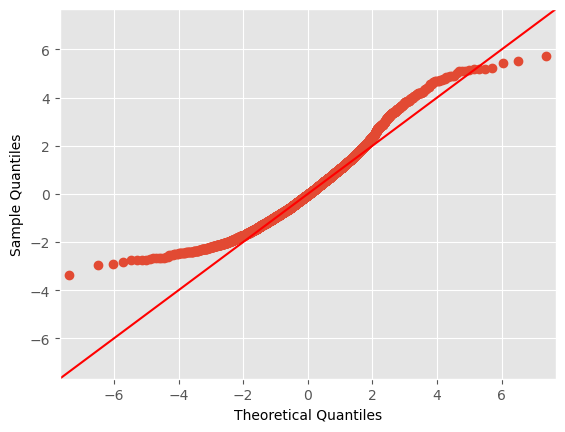

In [375]:
res = model.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

In [ ]:
#Adjusted R-square is 0.451 which is less compared to baseline model but Q-Q plot of the Residual is better leaning towards the fit suggesting residuals have a  a better normal distribution suggesting the fit of the model is better.


In [ ]:
#Iteration3

#apply feature scaling


In [245]:
#Histogram for cont.varaiable



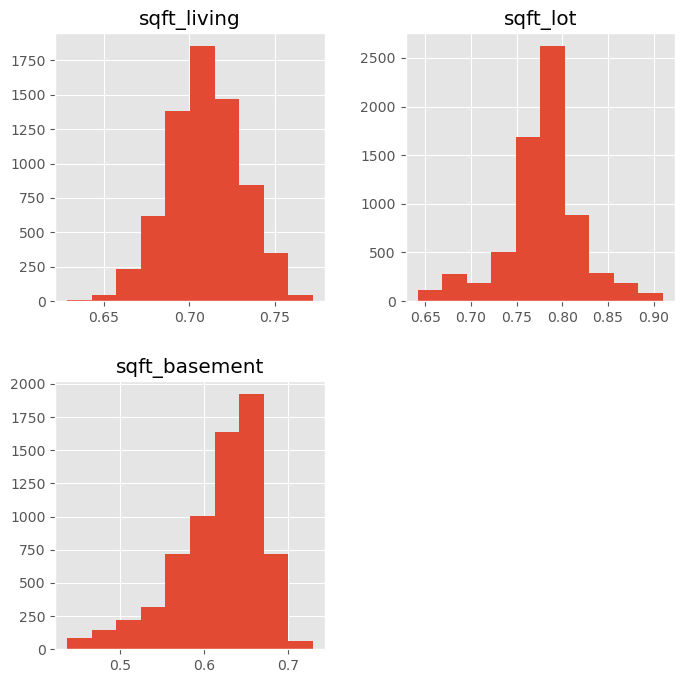

In [376]:
continuous = ['sqft_living','sqft_lot','sqft_basement']

New_data_cont = New_data[continuous]
New_data_cont.hist(figsize  = [8, 8]);

In [247]:
#skewness is an issue for most of our variables 


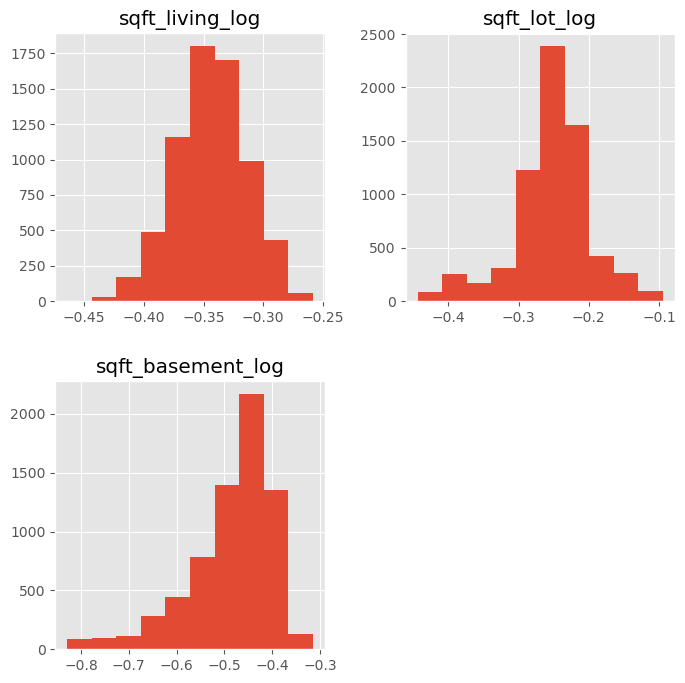

In [377]:
log_names = [f'{column}_log' for column in New_data_cont.columns]

New_data_log = np.log(New_data_cont)
New_data_log.columns = log_names
New_data_log.hist(figsize  = [8, 8]);
fig.tight_layout();

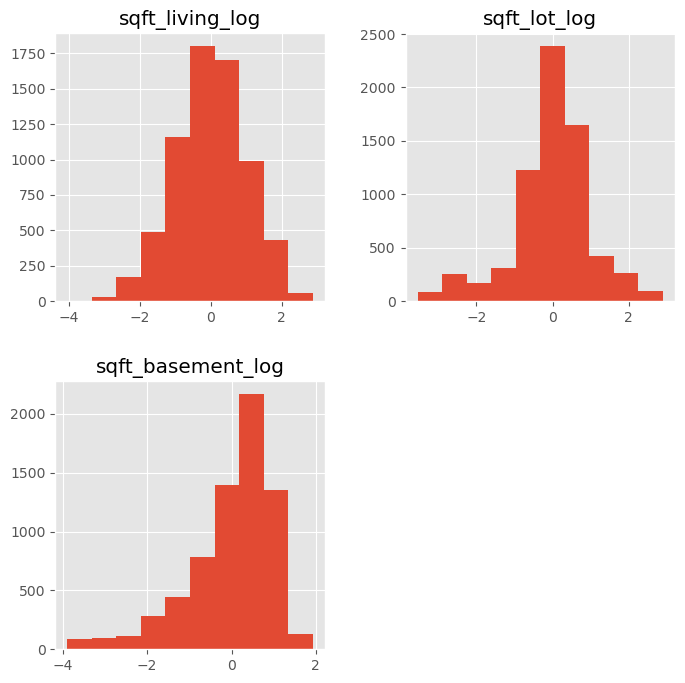

In [378]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = New_data_log.apply(normalize)

features_final.hist(figsize  = [8, 8]);

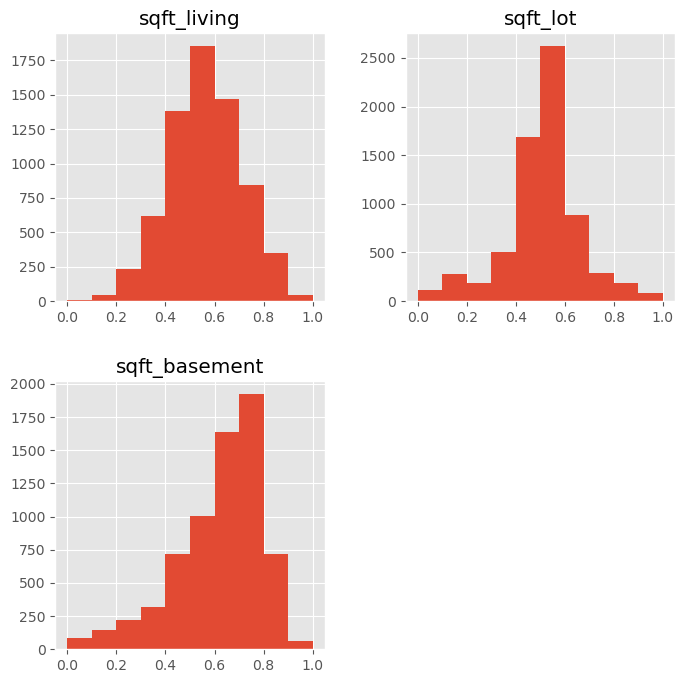

In [379]:
#MIN-MAX scaling
from sklearn.preprocessing import MinMaxScaler
continuous = ['sqft_living','sqft_lot','sqft_basement']

scaler = MinMaxScaler()
New_data[continuous] = scaler.fit_transform(New_data[continuous])
New_data[continuous].hist(figsize  = [8, 8]);

In [380]:
#little better in skewness
Categorical = ['price','condition_4', 'condition_5', 'Bed4_6' , 'bath2_5', 'grade8_11']
continuous = ['sqft_living','sqft_lot','sqft_basement']
Iteration3_data=pd.concat([New_data[continuous], New_data[Categorical]], axis= 1)
Iteration3_data.head()

,sqft_living,sqft_lot,sqft_basement,price,condition_4,condition_5,Bed4_6,bath2_5,grade8_11
id,,,,,,,,,
6414100192,0.658156,0.520702,0.497731,538000.0,0,0,0,1,0
2487200875,0.538243,0.447350,0.734703,604000.0,0,1,1,1,0
2414600126,0.494060,0.526637,0.675639,229500.0,0,0,0,0,0
9212900260,0.286829,0.484021,0.402497,468000.0,1,0,0,0,0
9297300055,0.716848,0.447350,0.751274,650000.0,0,0,1,1,1


In [381]:
Iteration3_data.isna().sum()

sqft_living      0
sqft_lot         0
sqft_basement    0
price            0
condition_4      0
condition_5      0
Bed4_6           0
bath2_5          0
grade8_11        0
dtype: int64

In [382]:
Iteration3_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842 entries, 6414100192 to 2997800021
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    6842 non-null   float64
 1   sqft_lot       6842 non-null   float64
 2   sqft_basement  6842 non-null   float64
 3   price          6842 non-null   float64
 4   condition_4    6842 non-null   uint8  
 5   condition_5    6842 non-null   uint8  
 6   Bed4_6         6842 non-null   uint8  
 7   bath2_5        6842 non-null   uint8  
 8   grade8_11      6842 non-null   uint8  
dtypes: float64(4), uint8(5)
memory usage: 300.7 KB


In [383]:
#drop sqaure feet basement as it had NAN VALUES  and combine condition 5 and conditon 5

Iteration3_data['condition4_5']= Iteration3_data['condition_4'] + Iteration3_data['condition_5']
FinalIteration3_data = Iteration3_data.drop(['sqft_basement', 'condition_4','condition_5'], axis=1)


In [384]:
FinalIteration3_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6842 entries, 6414100192 to 2997800021
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sqft_living   6842 non-null   float64
 1   sqft_lot      6842 non-null   float64
 2   price         6842 non-null   float64
 3   Bed4_6        6842 non-null   uint8  
 4   bath2_5       6842 non-null   uint8  
 5   grade8_11     6842 non-null   uint8  
 6   condition4_5  6842 non-null   uint8  
dtypes: float64(3), uint8(4)
memory usage: 240.5 KB


In [493]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(FinalIteration3_data)
scaled_df = pd.DataFrame(scaled_data, columns=FinalIteration3_data.columns)


In [494]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6842 entries, 0 to 6841
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sqft_living   6842 non-null   float64
 1   sqft_lot      6842 non-null   float64
 2   price         6842 non-null   float64
 3   Bed4_6        6842 non-null   float64
 4   bath2_5       6842 non-null   float64
 5   grade8_11     6842 non-null   float64
 6   condition4_5  6842 non-null   float64
dtypes: float64(7)
memory usage: 374.3 KB


In [495]:
scaled_df.isna().sum()

sqft_living     0
sqft_lot        0
price           0
Bed4_6          0
bath2_5         0
grade8_11       0
condition4_5    0
dtype: int64

In [504]:
outcome = 'price'
x3_cols = ['sqft_living', 'sqft_lot',  'condition4_5 ', 'Bed4_6' , 'bath2_5', 'grade8_11']
predictors = '+'.join(x3_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=scaled_df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     858.2
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:10:29   Log-Likelihood:                -7787.4
No. Observations:                6842   AIC:                         1.559e+04
Df Residuals:                    6835   BIC:                         1.564e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.249e-16      0.009   1.37e-14      1.000      -0.018       0.018
sqft_living      0.5651      0.014     41.407      0.000       0.538       0.592
sqft_lot        -0.2014      0.010    -19.275      0.000      -0.222      -0.181
condition4_5     0.0881      0.009      9.404      0.000       0.070       0.106
Bed4_6          -0.0354      0.011     -3.345      0.001      -0.056      -0.015
bath2_5         -0.0399      0.011     -3.615      0.000      -0.062      -0.018
grade8_11        0.2539      0.011     22.595      0.000       0.232       0.276
==============================================================================
Omnibus:                      812.678   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1336.742
Skew:                           0.826   Prob(JB):                    5.37e-291
Kurtosis:                       4.399   Cond. No.                         2.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

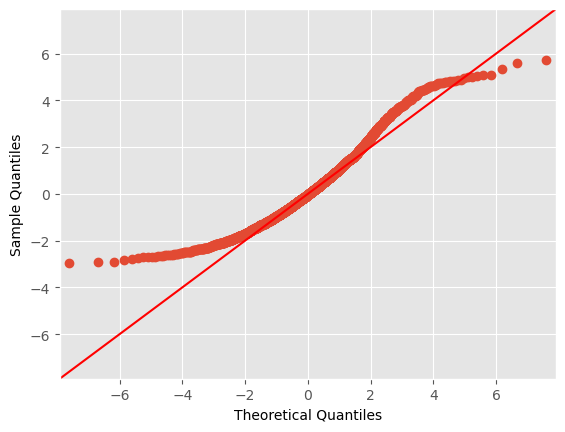

In [508]:
res = model.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

In [ ]:
#Adjusted R-square is 0.429 which is less compared to previous models but Q-Q plot of the Residual is the almost the same as Iteration 2
#The coefficients are used from this model for predicting the house prices


In [ ]:
# Model Validation

In [506]:
#Model validation

from sklearn.model_selection import train_test_split
X = scaled_df.drop("price", axis=1)
y =scaled_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [496]:
X_train = X_train.dropna()
X_train

,sqft_living,sqft_lot,Bed4_6,bath2_5,grade8_11,condition4_5
4326,-1.039124,0.347629,1.063079,-1.068710,-0.945366,-0.849014
1198,-1.340634,-2.453691,-0.940664,0.935707,1.057791,-0.849014
667,-0.557888,0.262751,-0.940664,0.935707,-0.945366,-0.849014
858,-0.868933,0.418245,1.063079,-1.068710,-0.945366,-0.849014
246,0.117252,-0.638499,-0.940664,-1.068710,1.057791,1.177837
...,...,...,...,...,...,...
905,-0.576298,-1.432711,1.063079,-1.068710,-0.945366,-0.849014
5192,-1.105808,0.642796,1.063079,-1.068710,-0.945366,-0.849014
3980,1.484369,-0.405109,1.063079,0.935707,1.057791,-0.849014
235,-0.150868,0.186360,-0.940664,-1.068710,1.057791,1.177837


In [497]:
X_test = X_test.dropna()
X_test

,sqft_living,sqft_lot,Bed4_6,bath2_5,grade8_11,condition4_5
6509,-1.039124,-2.540810,-0.940664,0.935707,1.057791,-0.849014
2270,-0.263167,0.039527,-0.940664,-1.068710,-0.945366,-0.849014
2363,0.931172,0.649525,1.063079,0.935707,-0.945366,1.177837
147,-0.952688,0.264172,-0.940664,0.935707,-0.945366,1.177837
6254,0.423245,0.882521,-0.940664,-1.068710,-0.945366,1.177837
...,...,...,...,...,...,...
507,0.545475,2.049498,-0.940664,0.935707,1.057791,1.177837
6277,0.045545,0.359093,1.063079,-1.068710,-0.945366,-0.849014
5202,-0.166615,-1.595014,1.063079,-1.068710,-0.945366,1.177837
98,0.001534,0.445990,-0.940664,0.935707,1.057791,-0.849014


In [498]:
y_test= y_test.dropna()
y_train = y_train,

In [507]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder


categorical = ['condition4_5', 'Bed4_6' , 'bath2_5', 'grade8_11']
continuous = ['sqft_living','sqft_lot']

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse=False)

# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categorical])

# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categorical]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categorical]), index=X_test.index)
], axis=1)


C:\Users\sri_s\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\sri_s\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:307: RuntimeWarning: invalid value encountered in log
  return func(X, **(kw_args if kw_args else {}))
C:\Users\sri_s\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:307: RuntimeWarning: invalid value encountered in log
  return func(X, **(kw_args if kw_args else {}))


In [499]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [500]:
linreg.fit(X_train, y_train)

LinearRegression()

In [501]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [503]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.5732431710926651
Test Mean Squared Error:  0.5617337437752656


In [ ]:
#Great, there does not seem to be a big difference between the train and test MSE! Thus The model is  generalizing well to future cases.


## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***